In [1]:
# importando as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# importação dos dados
renda = pd.read_csv('dados.csv')
renda.head()

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,"22,2"
1,Acre,2013,"12,37"
2,Alagoas,2013,"9,45"
3,Amapá,2013,"14,53"
4,Amazonas,2013,"18,25"


In [3]:
# Dimensão dos dados
renda.shape

(112, 3)

In [4]:
# Verificar se possui campos nulos
renda.isnull().sum()

Territorialidades    0
Ano                  0
PIB per capita       0
dtype: int64

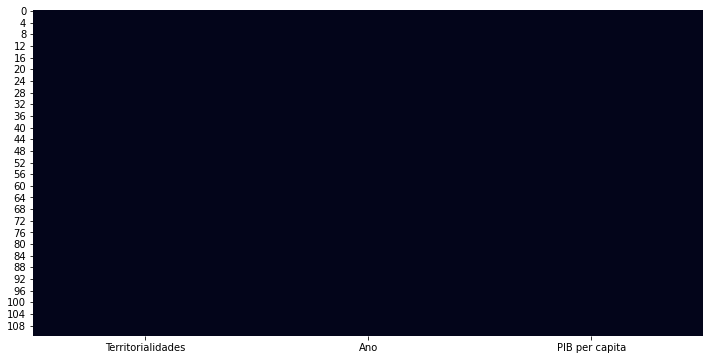

In [5]:
# Mapa de calor para ver campos nulos
plt.figure(figsize=(12,6))

sns.heatmap(renda.isnull(), cbar=False);

In [6]:
# Alterar a virgula para ponto na coluna PIB per capita
renda['PIB per capita'] = renda['PIB per capita'].str.replace(',','.')
renda

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.2
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25
...,...,...,...
107,Roraima,2016,14.22
108,Santa Catarina,2016,24.71
109,São Paulo,2016,30.24
110,Sergipe,2016,11.39


In [7]:
# Alterar tipo de objeto para Float
renda['PIB per capita'] = renda['PIB per capita'].astype(float)
renda

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25
...,...,...,...
107,Roraima,2016,14.22
108,Santa Catarina,2016,24.71
109,São Paulo,2016,30.24
110,Sergipe,2016,11.39


In [8]:
# Calcular a media por territorialidade
renda.groupby(by=['Territorialidades']).mean()

,Ano,PIB per capita
Territorialidades,,
Acre,2014.5,12.3000
Alagoas,2014.5,9.7400
Amapá,2014.5,13.4500
Amazonas,2014.5,16.6250
Bahia,2014.5,11.4825
Brasil,2014.5,21.5000
Ceará,2014.5,10.6150
Distrito Federal,2014.5,53.2925
Espírito Santo,2014.5,23.0025


In [9]:
# Verificar o valor medio por territoriedade e ano
renda.groupby(by= ['Territorialidades','Ano']).mean()


PIB per capita
Territorialidades Ano                 
Acre              2013           12.37
                  2014           13.41
                  2015           12.24
                  2016           11.18
Alagoas           2013            9.45
...                                ...
São Paulo         2016           30.24
Tocantins         2013           13.47
                  2014           13.77
                  2015           13.79
                  2016           13.68

[112 rows x 1 columns]

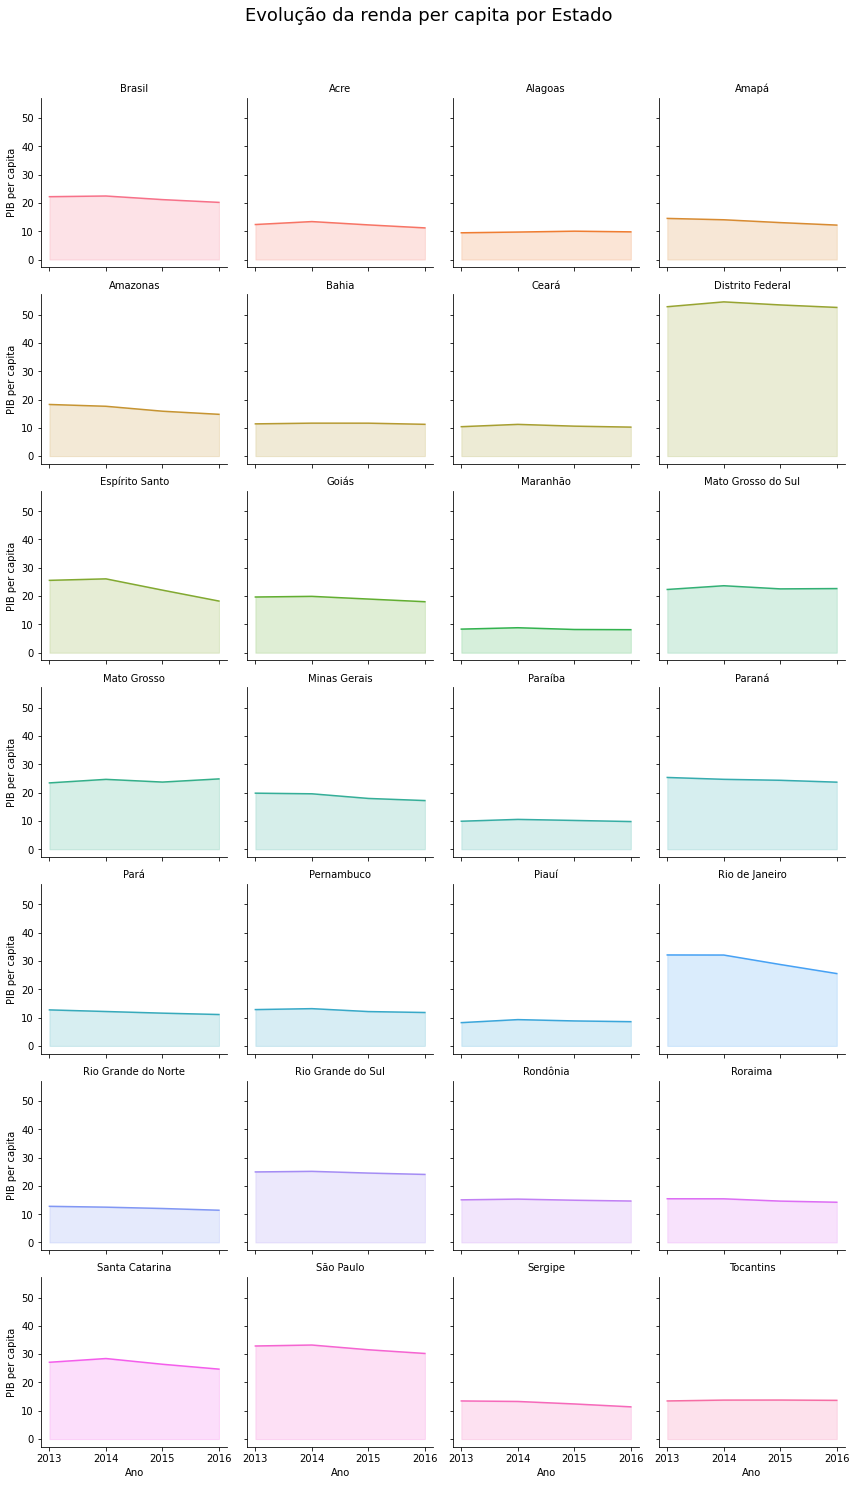

In [14]:
# Avaliar Pib Per Capita por territorialidade com Grids

Cor_fundo = '#f5f5f5'

# Criando o sistema de grids

grid = sns.FacetGrid(renda, col='Territorialidades', hue='Territorialidades', col_wrap=4)

# Adicionar gráfico de linhas

grid = grid.map(plt.plot, 'Ano', 'PIB per capita')

# Adicionar sobra e ajuste do título

grid = grid.map(plt.fill_between, 'Ano', 'PIB per capita', alpha=0.2).set_titles('{col_name} Territorialidades')

# Filtrar o título

grid = grid.set_titles('{col_name}')

# Definir um subtitle
grid = grid.fig.suptitle('Evolução da renda per capita por Estado', fontsize=18)

# Ajustar a altura
plt.subplots_adjust(top=0.92)